In [1]:
cases = pd.read_csv('./data/cases_normed.csv')
cases = cases[cases.Year >= 2002]
cases.head()

,Year,Month,Age,Weight
1434,2002,1,9.9,0.206984
1435,2002,1,12.6,0.221452
1436,2002,1,12.0,0.221452
1437,2002,1,6.0,0.206984
1438,2002,1,2.8,0.237208


In [2]:
# cases.hist(column='Age', bins=ages, weights=cases.Weight.values)
def draw (ages, cases=cases, fig = None, label=' '):
    if fig is None:
        fig, ax = plt.subplots()
    ax = fig.get_axes()[0]
    ax.hist(cases.Age, range=(0,100), bins=ages, weights=cases.Weight, label=label)
    ax.set_xticks(ages)
    ax.set_xticklabels(['{:.2f}'.format(a) for a in ages], rotation=90)
    ax.legend()
    return fig, ax

### Current and a finer division

Blue is a finer division of the current classes


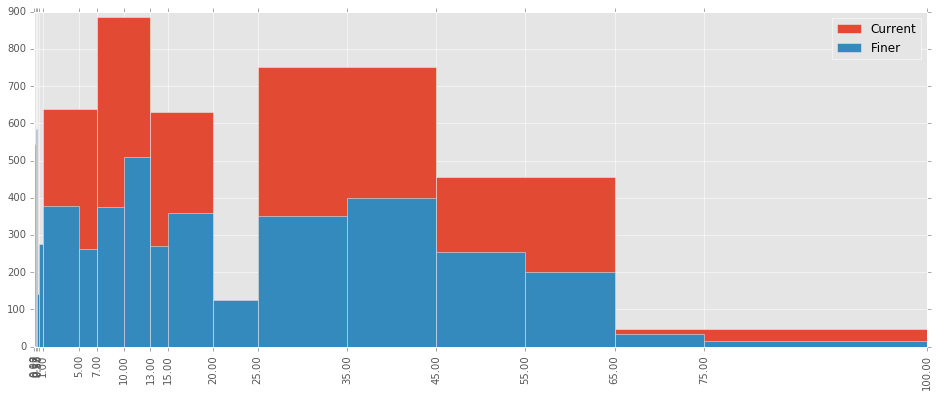

In [3]:
ages = (0,2/12,4/12,6/12,1,7,13,20,25,45,65,100)
ages2 = (0,2/12,4/12,6/12,1,5,7,10,13,15,20,25,35,45,55,65,75,100)
f,a = draw(ages, label='Current')
f,a = draw(ages2, fig=f, label='Finer')
a.set_xlim(0,100)
print ("Blue is a finer division of the current classes")

### Yearly division

Most sick are at 0, let's watch the rest


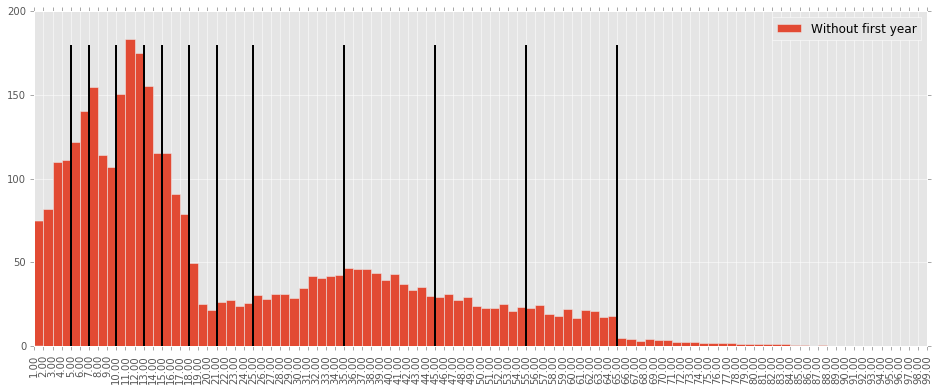

In [4]:
f, a = draw(np.arange(1,100), label="Without first year")
interesting = np.array((5,7,10,13,15,18,21,25,35,45,55,65))
a.vlines(interesting, 0,180, lw=2)
print ("Most sick are at 0, let's watch the rest")

### Fisrt 21 Years

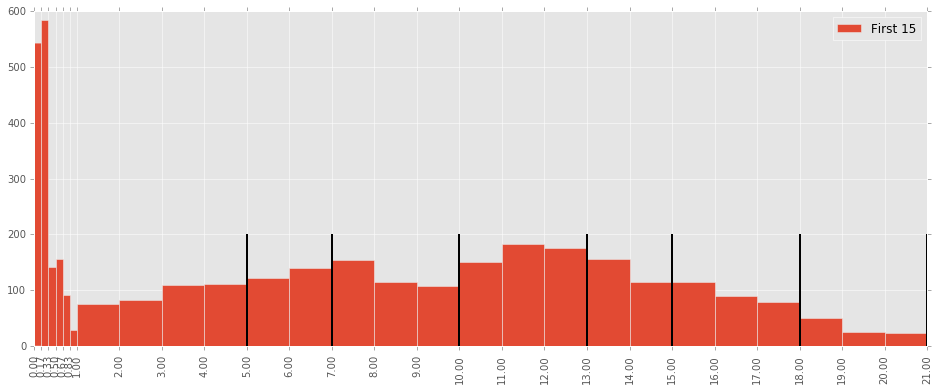

In [5]:
a1 = 1
a2 = 22
m2 = np.append(np.arange(0,a1,1/6),np.arange(a1,a2,1))
f, a = draw(m2, label="First 15")
a.vlines(interesting[np.where(interesting<=a2)], 0,200, lw=2)

### Final Division
This seems like a good division in my point of view.

Final Division
Age Groups: 31
0.0 Months - 2.0 Months, 2.0 Months - 4.0 Months, 4.0 Months - 6.0 Months, 6.0 Months - 8.0 Months, 8.0 Months - 10.0 Months, 10.0 Months - 12.0 Months, 1.0 Years - 2.0 Years, 2.0 Years - 3.0 Years, 3.0 Years - 4.0 Years, 4.0 Years - 5.0 Years, 5.0 Years - 5.0 Years, 5.0 Years - 6.0 Years, 6.0 Years - 7.0 Years, 7.0 Years - 7.0 Years, 7.0 Years - 8.0 Years, 8.0 Years - 9.0 Years, 9.0 Years - 10.0 Years, 10.0 Years - 10.0 Years, 10.0 Years - 11.0 Years, 11.0 Years - 12.0 Years, 12.0 Years - 13.0 Years, 13.0 Years - 15.0 Years, 15.0 Years - 18.0 Years, 18.0 Years - 21.0 Years, 21.0 Years - 25.0 Years, 25.0 Years - 35.0 Years, 35.0 Years - 45.0 Years, 45.0 Years - 55.0 Years, 55.0 Years - 65.0 Years, 65.0 Years - 100.0 Years, 

array([   0.        ,    0.16666667,    0.33333333,    0.5       ,
          0.66666667,    0.83333333,    1.        ,    2.        ,
          3.        ,    4.        ,    5.        ,    5.        ,
          6.        ,    7.        ,    7.        ,    8.        ,
          9.        ,   10.        ,   10.        ,   11.        ,
         12.        ,   13.        ,   15.        ,   18.        ,
         21.        ,   25.        ,   35.        ,   45.        ,
         55.        ,   65.        ,  100.        ])

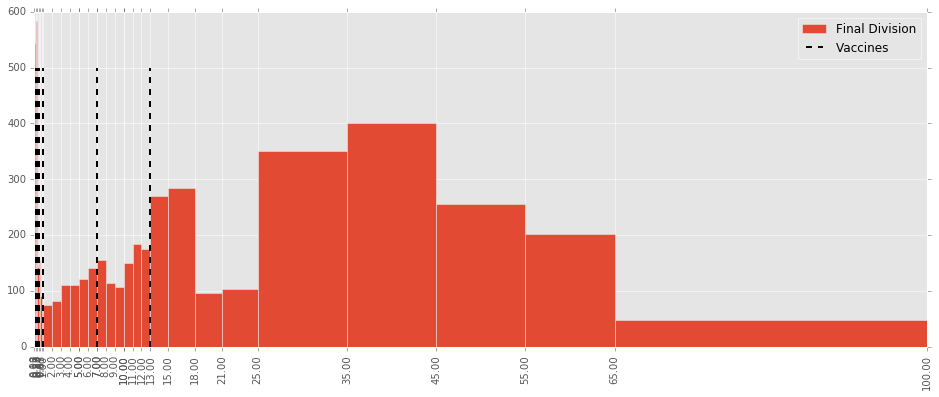

In [6]:
ages = np.hstack([np.arange(0,1,1/6), np.arange(1,13,1),interesting,100])
ages = np.sort(ages)

f, a = draw(ages, label="Final Division")
vaccines = np.array((2/12, 4/12, 6/12, 1, 7, 13))
a.vlines (vaccines, 0,500, lw=2, linestyle='--',label="Vaccines")
a.legend()
print ("Final Division")
print ("Age Groups: {}".format(ages.size))
for i in range(len(ages) - 1):
    if ages[i] < 1:
        print ("{} Months - {} Months".format(ages[i]*12, ages[i+1]*12), end = ", ")
    else:
        print ("{} Years - {} Years".format(ages[i], ages[i+1]), end = ", ")
        
ages 

(19771,)


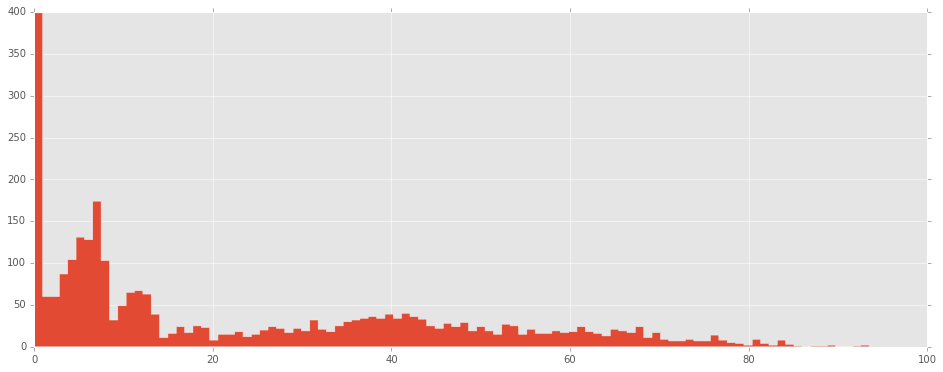

In [7]:
import pymc as pm
# data = np.histogram(cases.Age, range=(0,100), bins=np.arange(0,100), weights=cases.Weight)
# plt.plot(data[0]/data[0].max())
data = cases.Age[~cases.Age.isnull()].values
# data = (np.loadtxt("./data/mix.csv", delimiter=",") - 47) / 2.4
plt.hist(data[-3000:],bins=100, histtype='stepfilled')
print (data.shape)


In [8]:
# sf = pm.DiscreteUniform('sf', 3, 7)
# print (sf.value)
sf = 3
# p = pm.Uniform('p',0,1, size=sf-1)
p = pm.Dirichlet('p', np.ones(sf))
# pv = pm.CompletedDirichlet('pv', p)
print (p.value)
# print (pv.value)
# assign = pm.Categorical('assign', (p,1-p), size=data.size)
assign = pm.Categorical('assign', p, size=data.size)
stds = pm.Uniform("stds", 0, 10,size=sf)
taus = 1 / stds ** 2
mus = pm.Uniform('mus', 0, 100, size = sf)

@pm.deterministic
def mu_i(a = assign, m = mus):
    return m[a]

@pm.deterministic
def tau_i(a=assign, t=taus):
    return t[a]

print (assign.value[:5])
print (mu_i.value[:5])
print (tau_i.value[:5])


obs = pm.Normal("obs", mu_i, tau_i, value=data, observed=True, trace=False)

[ 0.45983474  0.37702187]
[0 0 0 0 2]
[ 63.1101642   63.1101642   63.1101642   63.1101642   31.70485118]
[ 1.67909575  1.67909575  1.67909575  1.67909575  0.04015302]


In [87]:
model = pm.Model([assign, sf, p, obs, mus, taus, stds])
mcmc = pm.MCMC(model)
b = 25000
mcmc.sample(b + 5000, b)

 [-----------------100%-----------------] 30000 of 30000 complete in 106.6 sec

In [88]:
import scipy.stats as stats
m_mus = mcmc.trace(mus)[:].mean(axis=0)
m_stds = mcmc.trace(stds)[:].mean(axis=0)
m_ps = mcmc.trace(p)[:].mean(axis=0)
m_ps = np.append(m_ps, 1 - m_ps.sum())
print (m_mus)
print (m_stds)
print (m_ps)


[ 22.95239265  20.31670422  10.8063949 ]
[ 9.99940873  9.99979399  8.89618167]
[ 0.22189022  0.76778485  0.01032493]


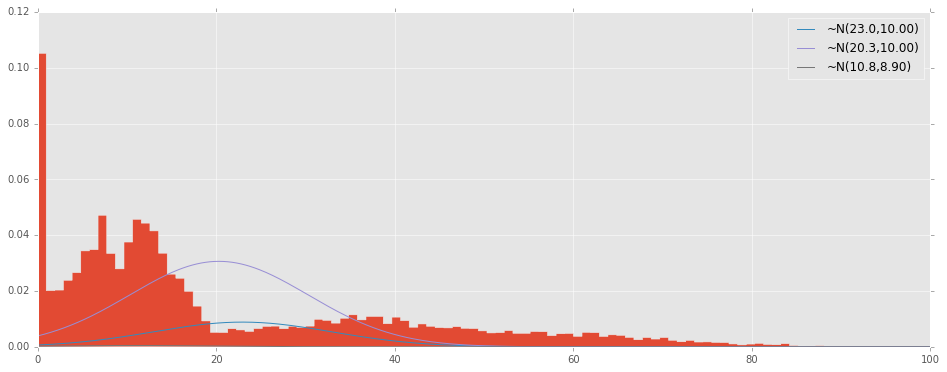

In [89]:

norm = stats.norm
fig, ax = plt.subplots()
x = np.linspace(0,100,400)
ax.hist(data,bins=100, histtype='stepfilled', normed=True)  
# ax.hist(data,bins=np.arange(0,100), histtype='stepfilled', normed=True)  
for i in range(sf):
    y = m_ps[i] * norm.pdf(x, m_mus[i], m_stds[i])
    ax.plot(x, y, label = "~N({:.1f},{:.2f})".format(m_mus[i], m_stds[i]))
ax.legend()
plt.show()

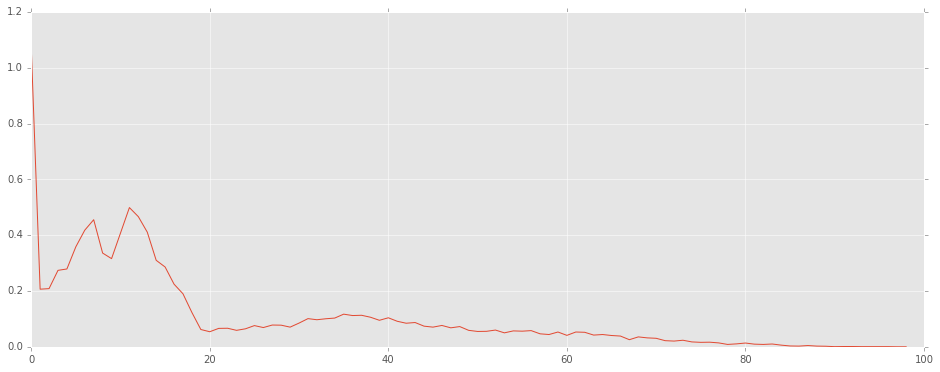

In [95]:
h = np.histogram(data, bins=np.arange(100))[0]
plt.plot(h/2000)

In [108]:
sf = 6
mus = pm.Uniform('mus', 0,100, size=sf)
stds = pm.Uniform('stds', 0,20, size=sf)
taus = 1 / stds ** 2
pdfs = pm.Normal('pdfs', mus, taus)
a = pm.Uniform('a',0,2000, size = sf)

@pm.deterministic
def sums(a=a, pdfs = pdfs):
    y = a*pdfs
    return y.sum()

obs = pm.Normal('obs', sums, 200, observed=True, value=h, trace = False)

In [109]:
model = pm.Model([mus, taus, stds, pdfs, a, sums, obs])
mcmc = pm.MCMC(model)
mcmc.sample(24000,4000)

 [-----------------100%-----------------] 24000 of 24000 complete in 7.7 sec

In [110]:
import scipy.stats as stats
m_mus = mcmc.trace(mus)[:].mean(axis=0)
m_stds = mcmc.trace(stds)[:].mean(axis=0)
m_sums = mcmc.trace(sums)[:].mean(axis=0)
m_a = mcmc.trace(a)[:].mean(axis=0)
print (m_mus)
print (m_stds)
print (m_a)

[  2.86302053  98.15309982   3.81995553  18.58034375  88.44153606
  98.22262891]
[ 19.52906687  19.81825831  19.16765934  17.76941632   1.14209624
  19.85058643]
[ 1286.71480401   351.32267693   324.95035084  1900.05456125  1377.07226984
    13.57673246]


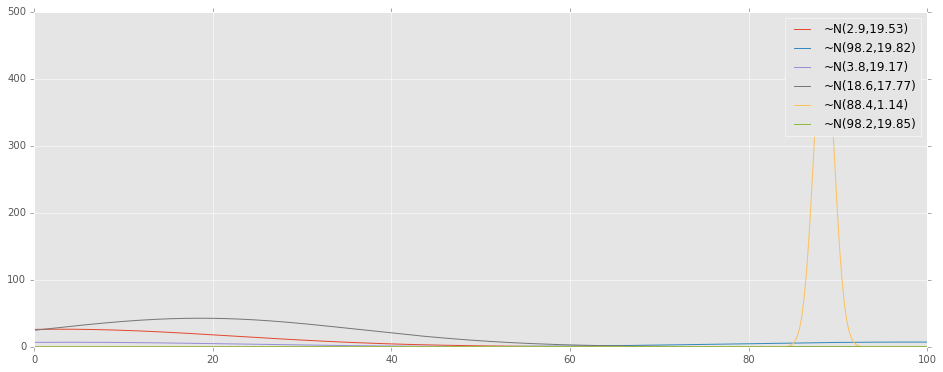

In [111]:
norm = stats.norm
fig, ax = plt.subplots()
x = np.linspace(0,100,400)
ax.hist(data,bins=100, histtype='stepfilled', normed=True)  
for i in range(sf):
    y = m_a[i] * norm.pdf(x, m_mus[i], m_stds[i])
    ax.plot(x, y, label = "~N({:.1f},{:.2f})".format(m_mus[i], m_stds[i]))
ax.legend()
plt.show()

In [ ]:
norm = stats.norm
fig, ax = plt.subplots()
x = np.linspace(0,100,400)
# ax.hist(data,bins=100, histtype='stepfilled', normed=True)  
for i in range(sf):
    y = m_a[i] * norm.pdf(x, m_mus[i], m_stds[i])
    ax.plot(x, y, label = "~N({:.1f},{:.2f})".format(m_mus[i], m_stds[i]))
ax.legend()
plt.show()